<font color='blue'> **13_Streamflow Routing_P2(?)** </font> 

In [ ]:
import os ; import pathlib as pl ; import flopy ; import matplotlib.pyplot as plt ; import numpy as np 
from pathlib import Path; from flopy.plot.styles import styles ; import pandas as pd ; import matplotlib as mpl; import pickle
from modflow_devtools.misc import get_env ; write=get_env("WRITE",True);run=get_env("RUN",True)

In [ ]:
sim_data  = Path("./_aux/13_sfr")          ; sim_data.mkdir(exist_ok=True)          ; exe_name = 'E:\\15_REPOS\\00_BETAMI\\bin\\mf6.exe' 
sim_ws    = Path("./13_sfr-p01b")          ; sim_ws.mkdir(exist_ok=True)            ; sim_name = gwf_name = "sfr-p01b"   
path = 'E:\\15_REPOS\\00_BETAMI\\bin\\data_modflow6-examples\\ex-gwf-sfr-p01b'     
fpath1 = os.path.join(path,"strt1.txt")    ; w1 = np.loadtxt(fpath1, dtype=float)  ; np.savetxt(sim_ws / "aa1.csv", w1, delimiter=",")
fpath2 = os.path.join(path,"idomain.txt")  ; w2 = np.loadtxt(fpath2, dtype=float)  ; np.savetxt(sim_ws / "aa2.csv", w2, delimiter=",")
fpath3 = os.path.join(path,"lakes.txt")    ; w3 = np.loadtxt(fpath3, dtype=float)  ; np.savetxt(sim_ws / "aa3.csv", w3, delimiter=",")
fpath4 = os.path.join(path,"top1.txt")     ; w4 = np.loadtxt(fpath4, dtype=float)  ; np.savetxt(sim_ws / "aa4.csv", w4, delimiter=",")
fpath5 = os.path.join(path,"bot1.txt")     ; w5 = np.loadtxt(fpath5, dtype=float)  ; np.savetxt(sim_ws / "aa5.csv", w5, delimiter=",")
fpath6 = os.path.join(path,"k11_lay1.txt") ; w6 = np.loadtxt(fpath6, dtype=float)  ; np.savetxt(sim_ws / "aa6.csv", w6, delimiter=",")
fpath7 = os.path.join(path,"sy1.txt")      ; w7 = np.loadtxt(fpath7, dtype=float)  ; np.savetxt(sim_ws / "aa7.csv", w7, delimiter=",")

In [17]:
nlay=2 ; nrow=15  ; ncol=10  ; shape3d=(nlay, nrow, ncol) ; strt1 = np.loadtxt(fpath1, dtype=float)  ;strt2=strt1  ; strt = [strt1, strt2]
idomain1 = np.loadtxt(fpath2, dtype=int)                   ; idomain = [idomain1, idomain1]      ; lake_map = np.ones(shape3d, dtype=int) * -1
lake_map[0, :, :] = np.loadtxt(fpath3, dtype=int) - 1                                            ; lake_map = np.ma.masked_where(lake_map < 0, lake_map)
top               = np.loadtxt(fpath4, dtype=float)
bot1              = np.loadtxt(fpath5, dtype=float)       ; bot2 = np.ones_like(bot1) * 300.0               ; botm = [bot1, bot2]
k11_lay1          = np.loadtxt(fpath6, dtype=float) * 2.5 ; k11_lay2 = np.ones_like(k11_lay1) * 0.35e-2     ; k11  = [k11_lay1, k11_lay2] ; k33 = 0.5e-5
sy1               = np.loadtxt(fpath7, dtype=float)       ; sy2 = np.ones_like(sy1) * 0.20                  ; sy   = [sy1, sy2]

In [18]:
#with open(sim_data/  "a_tdis_ds", 'wb') as handle: pickle.dump(tdis_ds, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(sim_data/ "a_tdis_ds"     ,'rb') as handle: tdis_ds     = pickle.load(handle)   ;a1=pd.DataFrame(tdis_ds)     ;a1.to_csv(sim_ws/"01_.csv")
with open(sim_data/ "a_wel_spd"     ,'rb') as handle: wel_spd     = pickle.load(handle)   ;a1=pd.DataFrame(wel_spd)     ;a1.to_csv(sim_ws/"02_.csv")
with open(sim_data/ "a_sfr_pakdata" ,'rb') as handle: sfr_pakdata = pickle.load(handle)   ;a1=pd.DataFrame(sfr_pakdata) ;a1.to_csv(sim_ws/"03_.csv")
with open(sim_data/ "a_sfr_conn"    ,'rb') as handle: sfr_conn    = pickle.load(handle)   ;a1=pd.DataFrame(sfr_conn)    ;a1.to_csv(sim_ws/"04_.csv")
with open(sim_data/ "a_uzf_pakdata" ,'rb') as handle: uzf_pakdata = pickle.load(handle)   ;a1=pd.DataFrame(uzf_pakdata) ;a1.to_csv(sim_ws/"05_.csv")
with open(sim_data/ "a_extwc"       ,'rb') as handle: extwc       = pickle.load(handle)   ;a1=pd.DataFrame(extwc)       ;a1.to_csv(sim_ws/"06_.csv")
with open(sim_data/ "a_finf"        ,'rb') as handle: finf        = pickle.load(handle)   ;a1=pd.DataFrame(finf)        ;a1.to_csv(sim_ws/"07_.csv")
with open(sim_data/ "a_mvr_spd"     ,'rb') as handle: mvr_spd     = pickle.load(handle)   ;a1=pd.DataFrame(mvr_spd)     ;a1.to_csv(sim_ws/"08_.csv")

In [19]:
length_units = "feet"; nper = 24 ;  nlay = 2 ;  nrow = 15 ;  ncol = 10 ;  delr = 5000 ;  delc = 5000 ;  strt = "varies" ;  k11_stream = 0.002 ;  
time_units = "seconds"; k11_basin = "varies" ;  lake_leakance = 0.000000002 ;  ss = 0.000001 ;  sy_stream = 0.2 ;  sy_basin = 0.1 ;  
evap_rate = 0.000000095 ;  ext_depth = 15    ; tdis_ds = tdis_ds   ; extents = (0.0, delr * ncol, 0.0, delc * nrow)  ; shape3d = (nlay, nrow, ncol)

strt1 = np.loadtxt   (fpath1, dtype=float)    ; strt2 = strt1                   ; strt = [strt1, strt2]
idomain1 = np.loadtxt(fpath2, dtype=int)      ; idomain = [idomain1, idomain1]  ; lake_map = np.ones(shape3d, dtype=int) * -1
lake_map[0, :, :] = np.loadtxt(fpath3, dtype=int) - 1                           ; lake_map = np.ma.masked_where(lake_map < 0, lake_map)
top               = np.loadtxt(fpath4, dtype=float)
bot1              = np.loadtxt(fpath5, dtype=float)       ; bot2 = np.ones_like(bot1) * 300.0           ; botm = [bot1, bot2]
k11_lay1          = np.loadtxt(fpath6, dtype=float) * 2.5 ; k11_lay2 = np.ones_like(k11_lay1) * 0.35e-2 ; k11  = [k11_lay1, k11_lay2] ; k33 = 0.5e-5
sy1               = np.loadtxt(fpath7, dtype=float)       ; sy2 = np.ones_like(sy1) * 0.20              ; sy   = [sy1, sy2]

ghb_spd = [[0, 12, 0, 988.0, 0.038],[0, 13, 8, 1045.0, 0.038]]
wel_spd = wel_spd             ; sfr_pakdata = sfr_pakdata             ; sfr_conn = sfr_conn        ; sfr_div = [[3, 0, 9, "UPTO"]]
sfr_spd = [[0, "inflow", 25.0],[3, "diversion", 0, 10.0],[15, "inflow", 10.0],[25, "inflow", 150.0]]     

uzf_pakdata = uzf_pakdata; finf = finf  ; extwc = extwc

uzf_spd = {}  ; pET = 1.00e-08 ; extdp = 15.0 ; ha = 0.0 ;  hroot = 0.0 ; rootact = 0.0
for tm in range(len(tdis_ds)):
    sp = [] ;     iuzno = 0
    for i in range(len(extwc)):
        sp.append((iuzno, finf[tm][i], pET, extdp, extwc[i], ha, hroot, rootact))  ;         iuzno += 1
    uzf_spd.update({int(tm): sp})

lak_stage = (1040.0, 1010.0,)   
lak_outlets = [[0, 0, -1, "MANNING", 1040.0004, 12.0, 0.29999999e-01, 0.14285709e-02],
               [1, 1, -1, "MANNING", 1000.0000, 60.0, 0.29999999e-01, 0.12500000e-02]]
lk_spd = {0: [[0, "rainfall", 0.500e-07],[0, "evaporation", 0.100e-07],[0, "runoff", 1.50],[0, "withdrawal", 0.00],
              [1, "rainfall", 0.120e-07],[1, "evaporation", 0.110e-07],[1, "runoff", 3.00],[1, "withdrawal", 0.12]]}
mvr_pack = [["UZF-1"], ["SFR-1"], ["LAK-1"], ["WEL-1"]]   ; maxpackages = len(mvr_pack)  ; max_mvr = 200   ; mvr_spd = mvr_spd

In [20]:
# sfr_obs_dict = 
# lak_obs_dict = {"obs_lak.csv": [("LAK1_STAGE", "STAGE", 1),("LAK2_STAGE", "STAGE", 2),("LAK1_TO-MVR", "TO-MVR", 1),("LAK1_FROM-MVR", "FROM-MVR", 1),("LAK2_TO-MVR", "TO-MVR", 2),("LAK2_FROM-MVR", "FROM-MVR", 2)]}
# uzf_obs_dict = {"obs_uzf.csv": [("ninfil", "net-infiltration", "ag"),("rejinf", "rej-inf", "ag"),("rejinfmvr", "rej-inf-to-mvr", "ag"),("infil", "infiltration", "ag"),("frommvr", "from-mvr", "ag"),("gwrch", "uzf-gwrch", "ag"),("gwet", "uzf-gwet", "ag"),("uzet", "uzet", "ag"),],"obs_uzf_column.csv": [("id26_infil", "infiltration", 26),("id126_infil", "infiltration", 126),("id26_dpth=20", "water-content", 26, 20.0),("id126_dpth=51", "water-content", 126, 1.0),("id26_rch", "uzf-gwrch", 26),("id126_rch", "uzf-gwrch", 126),("id26_gwet", "uzf-gwet", 26),("id126_gwet", "uzf-gwet", 126),("id26_uzet", "uzet", 26),("id126_uzet", "uzet", 126),("id26_gwd2mvr", "uzf-gwd-to-mvr", 26),("id126_gwd2mvr", "uzf-gwd-to-mvr", 126),("id26_rejinf", "rej-inf-to-mvr", 26),("id126_rejinf", "rej-inf-to-mvr", 126)]}

In [21]:
#with open(sim_data/ "a_sfr_obs_dict", 'wb') as handle: pickle.dump(sfr_obs_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(sim_data/ "a_sfr_obs_dict"  ,'rb') as handle: sfr_obs_dict = pickle.load(handle) #  ;a1=pd.DataFrame(a_mvr_spd)     ;a1.to_csv(sim_ws/"01_.csv")
with open(sim_data/ "a_lak_obs_dict"  ,'rb') as handle: lak_obs_dict = pickle.load(handle) #  ;a1=pd.DataFrame(a_mvr_spd)     ;a1.to_csv(sim_ws/"01_.csv")
with open(sim_data/ "a_uzf_obs_dict"  ,'rb') as handle: uzf_obs_dict = pickle.load(handle) #  ;a1=pd.DataFrame(a_mvr_spd)     ;a1.to_csv(sim_ws/"01_.csv")

In [22]:
def build_models():
    sfr_obs_file = f"{sim_name}.sfr.obs" 
    with open(sim_data/ "a_sfr_obs_dict", 'rb') as handle:  sfr_obs_dict = pickle.load(handle)  ; lak_obs_file = f"{sim_name}.lak.obs"
    with open(sim_data/ "a_lak_obs_dict", 'rb') as handle:  lak_obs_dict = pickle.load(handle)  ; uzf_obs_file = f"{sim_name}.uzf.obs"
    with open(sim_data/ "a_uzf_obs_dict", 'rb') as handle:  uzf_obs_dict = pickle.load(handle)  ; 

    sim = flopy.mf6.MFSimulation (sim_name=sim_name, sim_ws=sim_ws, exe_name="mf6")
    flopy.mf6.ModflowTdis (sim, nper=nper, perioddata=tdis_ds, time_units=time_units)
    flopy.mf6.ModflowIms (sim,print_option="summary",complexity="complex",outer_dvclose=1.0e-4,outer_maximum=2000,
                          under_relaxation="dbd",linear_acceleration="BICGSTAB",under_relaxation_theta=0.7,under_relaxation_kappa=0.08,
                          under_relaxation_gamma=0.05,under_relaxation_momentum=0.0,backtracking_number=20,backtracking_tolerance=2.0,
                          backtracking_reduction_factor=0.2,backtracking_residual_limit=5.0e-4,inner_dvclose=1.0e-5,
                          rcloserecord="0.0001 relative_rclose",inner_maximum=100,relaxation_factor=0.0,
                          number_orthogonalizations=2,preconditioner_levels=8,preconditioner_drop_tolerance=0.001)
    gwf = flopy.mf6.ModflowGwf (sim, modelname=sim_name, newtonoptions="newton", save_flows=True)
    flopy.mf6.ModflowGwfdis    (gwf,length_units=length_units,nlay=nlay,nrow=nrow,ncol=ncol,delr=delr,delc=delc,idomain=idomain,top=top,botm=botm)
    flopy.mf6.ModflowGwfnpf    (gwf,alternative_cell_averaging="AMT-HMK",icelltype=1,k=k11,k33=k33,save_specific_discharge=True)
    flopy.mf6.ModflowGwfsto    (gwf,iconvert=1,sy=sy,ss=ss,steady_state={0: True},transient={1: True})
    flopy.mf6.ModflowGwfic     (gwf, strt=strt)
    flopy.mf6.ModflowGwfghb    (gwf, stress_period_data=ghb_spd)
    flopy.mf6.ModflowGwfwel     (gwf,print_input=True,print_flows=True,save_flows=True,mover=True,pname="WEL-1",stress_period_data=wel_spd)
    sfr = flopy.mf6.ModflowGwfsfr(gwf,print_flows=True,print_stage=True,save_flows=True,boundnames=True,budget_filerecord=sim_name + ".sfr.bud",
                                  mover=True,pname="SFR-1",maximum_depth_change=0.1e-05,length_conversion=3.28081,nreaches=len(sfr_pakdata),
                                  packagedata=sfr_pakdata,connectiondata=sfr_conn,diversions=sfr_div,perioddata=sfr_spd,filename=f"{sim_name}.sfr")
    sfr.obs.initialize (filename=sfr_obs_file,digits=10,print_input=True,continuous=sfr_obs_dict)
    (idomain_wlakes, lakepakdata_dict, lakeconnectiondata) \
    = (flopy.mf6.utils.get_lak_connections(gwf.modelgrid,lake_map,idomain =  gwf.dis.idomain.array,bedleak=lake_leakance))     ;  lak_pakdata = []
    for key in lakepakdata_dict.keys(): lak_pakdata.append([key, lak_stage[key], lakepakdata_dict[key]])
    lak = flopy.mf6.ModflowGwflak  (gwf,print_stage=True,print_flows=True,save_flows=True,budget_filerecord=sim_name + ".lak.bud",    # Gwf___lak
                                    length_conversion=3.28081,mover=True,pname="LAK-1",boundnames=False,nlakes=len(lak_pakdata),
                                    noutlets=len(lak_outlets),outlets=lak_outlets,packagedata=lak_pakdata,
                                    connectiondata=lakeconnectiondata,perioddata=lk_spd,filename=f"{sim_name}.lak")
    lak.obs.initialize (filename=lak_obs_file, digits=10, continuous=lak_obs_dict)
    uzf = flopy.mf6.ModflowGwfuzf  (gwf,nuzfcells=len(uzf_pakdata),boundnames=True,ntrailwaves=10,nwavesets=50,print_flows=False,     # Gwf___uzf
                                    save_flows=True,simulate_et=True,linear_gwet=True,simulate_gwseep=True,mover=True,
                                    packagedata=uzf_pakdata,perioddata=uzf_spd,
                                    budget_filerecord=f"{sim_name}.uzf.bud",pname="UZF-1",filename=f"{sim_name}.uzf")
    uzf.obs.initialize (filename=uzf_obs_file, print_input=True, continuous=uzf_obs_dict)
    flopy.mf6.ModflowGwfmvr      (gwf,maxmvr=max_mvr,print_flows=True,maxpackages=maxpackages,packages=mvr_pack,perioddata=mvr_spd,   # Gwf__mvr
                                  pname="MVR-1",   budget_filerecord=sim_name + ".mvr.bud",filename=f"{sim_name}.mvr")                
    gwf.dis.idomain = idomain_wlakes  ;    head_filerecord = f"{sim_name}.hds"   ; budget_filerecord = f"{sim_name}.cbc"
    flopy.mf6.ModflowGwfoc(gwf,head_filerecord=head_filerecord,budget_filerecord=budget_filerecord,saverecord=[("HEAD", "LAST"), ("BUDGET", "LAST")])
    return sim
def write_models(sim, silent=True):  sim.write_simulation(silent=silent)
def run_models(sim, silent=True):    success, buff = sim.run_simulation(silent=silent)   ; assert success, buff
def simulation(idx, silent=True):    
    sim = build_models()   
    if write:         write_models(sim, silent=silent)
    if run:           run_models(sim, silent=silent)
simulation(0)

In [23]:
sim = flopy.mf6.MFSimulation.load(sim_ws = sim_ws ,exe_name=exe_name, verbosity_level=0) ; gwf = sim.get_model(sim_name)
print("OC package_Flow  : ", gwf.oc.output.methods()) 

OC package_Flow  :  ['list()', 'zonebudget()', 'budget()', 'budgetcsv()', 'head()']


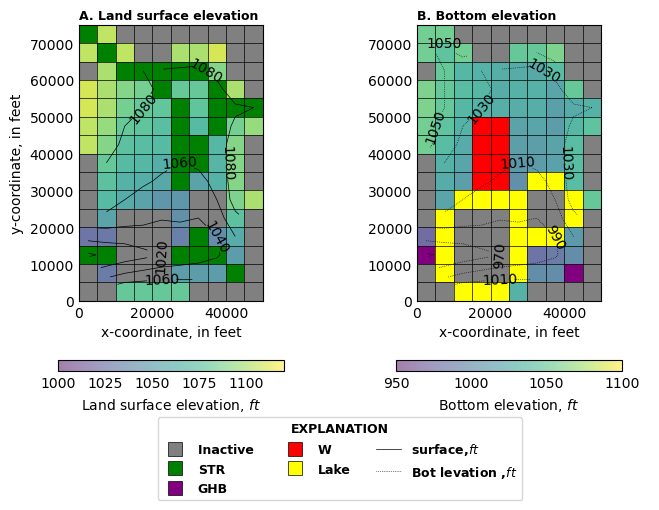

In [24]:
fig = plt.figure(figsize=(8, 6), constrained_layout=False)   
gs = mpl.gridspec.GridSpec(nrows=7, ncols=10, figure=fig, wspace=5)  ; plt.axis("off")
axes = []    ; axes.append(fig.add_subplot(gs[:6, :5]))              ; axes.append(fig.add_subplot(gs[:6, 5:], sharey=axes[0]))
for ax in axes:
    ax.set_xlim(extents[:2])  ; ax.set_ylim(extents[2:]) ; ax.set_aspect("equal")
axes.append(fig.add_subplot(gs[6:, :]))  ; ax = axes[-1]  ; ax.set_xlim(0, 1)  ; ax.set_ylim(0, 1)  # LEGEND
ax.axis("off") ; ax.set_xticks([]) ; ax.set_yticks([]) ; ax.spines["top"].set_color("none")  
ax.spines["bottom"].set_color("none") ; ax.spines["left"].set_color("none") ; ax.spines["right"].set_color("none") ; ax.patch.set_alpha(0.0)

ax = axes[0] ; mm = flopy.plot.PlotMapView(gwf, ax=ax, extent=extents)
top_coll = mm.plot_array(top, vmin=1000, vmax=1120, masked_values=(0, 1e30, -1e30), alpha=0.5)
mm.plot_bc("SFR", color="green")
cv = mm.contour_array(top,levels=np.arange(1000, 1100, 20),linewidths=0.5,linestyles="-",colors="black",masked_values=(0, 1e30, -1e30))
plt.clabel(cv, fmt="%1.0f") ; mm.plot_inactive(color_noflow="0.5") ; mm.plot_grid(lw=0.5, color="black")
cbar = plt.colorbar(top_coll, shrink=0.8, orientation="horizontal", ax=ax, format="%.0f")     ; cbar.ax.tick_params(size=0)
cbar.ax.set_xlabel(r"Land surface elevation, $ft$") ; ax.set_xlabel("x-coordinate, in feet") ; ax.set_ylabel("y-coordinate, in feet")
styles.heading(ax, heading="Land surface elevation", idx=0) ; styles.remove_edge_ticks(ax)

ax = axes[1]
mm = flopy.plot.PlotMapView(gwf, ax=ax, extent=extents)
bot_coll = mm.plot_array(botm, vmin=950, vmax=1100, masked_values=(0, 1e30, -1e30), alpha=0.5)
mm.plot_bc("GHB", color="purple") ; mm.plot_bc("WEL", color="red", kper=1)  ; mm.plot_bc("LAK", color="yellow", kper=1)  
cv = mm.contour_array(botm,levels=np.arange(950, 1100, 20),linewidths=0.5,linestyles=":",colors="black",masked_values=(0, 1e30, -1e30))
plt.clabel(cv, fmt="%1.0f") ; mm.plot_inactive(color_noflow="0.5") ; mm.plot_grid(lw=0.5, color="black")
cbar = plt.colorbar(bot_coll, shrink=0.8, orientation="horizontal", ax=ax, format="%.0f")
cbar.ax.tick_params(size=0) ; cbar.ax.set_xlabel(r"Bottom elevation, $ft$") ; ax.set_xlabel("x-coordinate, in feet")
styles.heading(ax, heading="Bottom elevation", idx=1) ; styles.remove_edge_ticks(ax)

ax=axes[-1]
ax.plot(-10000,-10000,lw=0,marker="s",ms=10,mfc="0.5",mec="black",markeredgewidth=0.5,label="Inactive ")
ax.plot(-10000,-10000,lw=0,marker="s",ms=10,mfc="green",mec="black",markeredgewidth=0.5,label="STR")
ax.plot(-10000,-10000,lw=0,marker="s",ms=10,mfc="purple",mec="black",markeredgewidth=0.5,label="GHB")
ax.plot(-10000,-10000,lw=0,marker="s",ms=10,mfc="red",mec="black",markeredgewidth=0.5,label="W")
ax.plot(-10000,-10000,lw=0,marker="s",ms=10,mfc="yellow",mec="black",markeredgewidth=0.5,label="Lake")
ax.plot(-10000,-10000,lw=0.5,ls="-",color="black",label=r"surface,$ft$")
ax.plot(-10000,-10000,lw=0.5,ls=":",color="black",label=r"Bot levation ,$ft$")

styles.graph_legend(ax, loc="center", ncol=3)  ; plt.show()


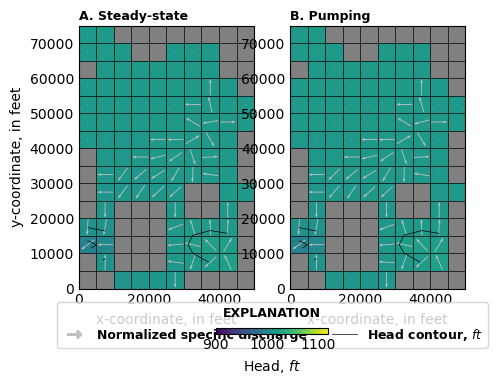

In [25]:
hobj = gwf.output.head()  ;     cobj = gwf.output.budget()  ;     kstpkper = hobj.get_kstpkper()
fig = plt.figure(figsize=(5, 4), constrained_layout=False) ; gs = mpl.gridspec.GridSpec(ncols=10, nrows=7, figure=fig, wspace=5) ; plt.axis("off")
axes = [fig.add_subplot(gs[:6, :5])]  ; axes.append(fig.add_subplot(gs[:6, 5:], sharey=axes[0]))
for ax in axes:
    ax.set_xlim(extents[:2]) ;     ax.set_ylim(extents[2:])  ;     ax.set_aspect("equal")
    
axes.append(fig.add_subplot(gs[6:, :])) ; ax = axes[-1] ; ax.set_xlim(0, 1) ; ax.set_ylim(0, 1)
ax.axis("off") ; ax.set_xticks([]) ; ax.set_yticks([]) ; ax.spines["top"].set_color("none") ; ax.spines["bottom"].set_color("none") ; 
ax.spines["left"].set_color("none") ; ax.spines["right"].set_color("none") ; ax.patch.set_alpha(0.0)
head = hobj.get_data(kstpkper=kstpkper[0])                    # H & Q for first stress period
qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(cobj.get_data(text="DATA-SPDIS", kstpkper=kstpkper[0])[0], gwf)

ax = axes[0]
mm = flopy.plot.PlotMapView(gwf, ax=ax, extent=extents)  ; head_coll = mm.plot_array(head, vmin=900, vmax=1120, masked_values=(0, 1e30, -1e30))
cv = mm.contour_array(head,levels=np.arange(900, 1100, 10),linewidths=0.5,linestyles="-",colors="black",masked_values=(0, 1e30, -1e30))
plt.clabel(cv, fmt="%1.0f") ; mm.plot_vector(qx, qy, normalize=True, color="0.75") ; mm.plot_inactive(color_noflow="0.5")
mm.plot_grid(lw=0.5, color="black") ; ax.set_xlabel("x-coordinate, in feet")
ax.set_ylabel("y-coordinate, in feet") ; styles.heading(ax, heading="Steady-state", idx=0) ; styles.remove_edge_ticks(ax)


head = hobj.get_data(kstpkper=kstpkper[1])
qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(cobj.get_data(text="DATA-SPDIS", kstpkper=kstpkper[1])[0], gwf)
ax = axes[1]  
mm = flopy.plot.PlotMapView(gwf, ax=ax, extent=extents) ; head_coll = mm.plot_array(head, vmin=900, vmax=1120, masked_values=(0, 1e30, -1e30))
cv = mm.contour_array(head,levels=np.arange(900, 1100, 10),linewidths=0.5,linestyles="-",colors="black",masked_values=(0, 1e30, -1e30))
plt.clabel(cv, fmt="%1.0f") ; mm.plot_vector(qx, qy, normalize=True, color="0.75") ; mm.plot_inactive(color_noflow="0.5")
mm.plot_grid(lw=0.5, color="black") ; ax.set_xlabel("x-coordinate, in feet") ; styles.heading(ax, heading="Pumping", idx=1)  
styles.remove_edge_ticks(ax)
ax = axes[-1]
cbar = plt.colorbar(head_coll, shrink=0.8, orientation="horizontal", ax=ax, format="%.0f")
cbar.ax.tick_params(size=0); cbar.ax.set_xlabel(r"Head, $ft$")
ax.plot(-10000,-10000,lw=0,marker="$\u2192$",ms=10,mfc="0.75",mec="0.75",label="Normalized specific discharge")
ax.plot(-10000, -10000, lw=0.5, color="black", label=r"Head contour, $ft$") ; styles.graph_legend(ax, loc="upper center", ncol=2) ; plt.show()

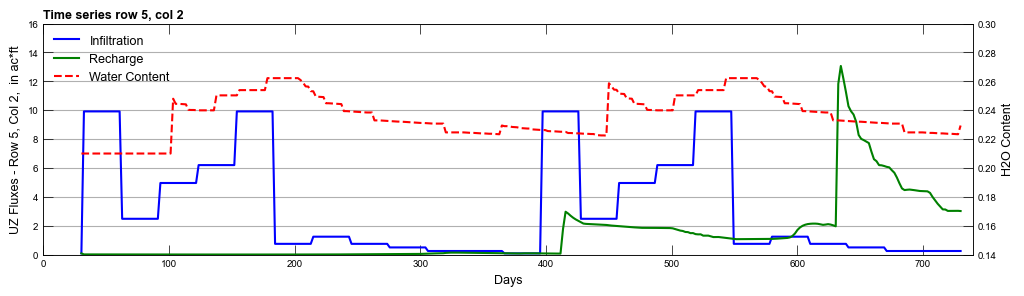

In [26]:
def plot_uzfcolumn_results(idx, gwf, silent=True):
    with styles.USGSPlot():
        # sim_ws = os.path.join(workspace, sim_name)
        t = 86400 / 43560
        fname    = os.path.join(sim_ws, "obs_uzf_column.csv")  ; uzf_dat = pd.read_csv(fname, header=0) ; uzf_dat["time_days"] = uzf_dat["time"] / 86400
        x= uzf_dat["time_days"] ;finf=uzf_dat["ID26_INFIL"]*t ;rch=(uzf_dat["ID26_RCH"]+uzf_dat["ID126_RCH"])*t; wc= uzf_dat["ID26_DPTH=20"]
        
        fig = plt.figure(figsize=(12, 3)) ; ax1 = fig.add_subplot(1, 1, 1) ; ln1 = ax1.plot(x, finf, color="b", label="Infiltration")  
        ln2 = ax1.plot(x, rch, color="g", label="Recharge") ; ax2 = ax1.twinx() ; ln3 = ax2.plot(x, wc, "r--", label="Water Content")
        
        ax1.set_xlabel("Days") ;ax1.set_xlim(0,740)  ;ax1.set_ylim(0,16) ;ax2.set_ylim(0.14,0.3) ;ax2.set_ylabel("H2O Content"); ax1.yaxis.grid("on")
        lns = ln1 + ln2 + ln3  ; labs = [l.get_label() for l in lns]     ; ax1.legend(lns, labs, loc="upper left")
        styles.heading(heading="Time series row 5, col 2") ; ax1.set_ylabel("UZ Fluxes - Row 5, Col 2,  in ac*ft")  
        if plot_show: plt.show()
def plot_results(idx, sim, silent=True): gwf = sim.get_model(sim_name) ; plot_uzfcolumn_results(idx, gwf, silent=silent)
def simulation(idx, silent=True): 
    sim = build_models()
    if plot: plot_results(idx, sim, silent=silent)
simulation(0)

In [27]:
sim = flopy.mf6.MFSimulation.load(sim_ws = sim_ws ,exe_name=exe_name, verbosity_level=0)         ; gwf = sim.get_model(sim_name)   
print("OC package_Flow  : ", gwf.oc.output.methods())          ; mvr = gwf.get_package("MVR-1")  ; #mvr_Q = mvr.output.budget()        

OC package_Flow  :  ['list()', 'zonebudget()', 'budget()', 'budgetcsv()', 'head()']


In [28]:
obs=sim.get_model().sfr.output.obs().get_data() ;p0=pd.DataFrame(obs) ;p1=p0.rename(columns=lambda x:'a'+str(x)) ;p1.to_csv(sim_ws/"c5_sfr.output.csv")
obs=sim.get_model().lak.output.obs().get_data() ;p0=pd.DataFrame(obs) ;p1=p0.rename(columns=lambda x:'a'+str(x)) ;p1.to_csv(sim_ws/"c6_lak.output.csv")
p0=pd.DataFrame(sfr_pakdata) ;p1=p0.rename(columns=lambda x:'a'+str(x)) ; p2=p1['a1'].apply(pd.Series) ;p3=p2.rename(columns=lambda x:'b'+str(x)) 
p4=pd.concat([p3[:],p1[:]],axis=1) ; p4.to_csv(sim_ws/"c2_sfr_pakdata.csv") 
sfr_pakdata_pd=p4                  
p0=pd.DataFrame(uzf_pakdata) ;p1=p0.rename(columns=lambda x:'a'+str(x)) ;p2=p1['a1'].apply(pd.Series) ;p3=p2.rename(columns=lambda x:'b'+str(x)) 
p4=pd.concat([p3[:],p1[:]],axis=1) ; p4.to_csv(sim_ws/"c1_uzf_pakdata.csv") 
mvr_sp2=pd.DataFrame.from_dict(mvr_spd,orient='index')                         ;mvr_sp2 #mvr_sp2.to_csv(sim_ws/"c4_mvr_spd.csv")

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
0,"(SFR-1, 22, LAK-1, 0, FACTOR, 1.0)","(LAK-1, 0, SFR-1, 23, FACTOR, 1.0)","(SFR-1, 28, LAK-1, 1, FACTOR, 1.0)","(LAK-1, 1, SFR-1, 29, FACTOR, 1.0)","(UZF-1, 0, SFR-1, 0, FACTOR, 1.0)","(UZF-1, 1, SFR-1, 1, FACTOR, 1.0)","(UZF-1, 2, SFR-1, 1, FACTOR, 1.0)","(UZF-1, 3, SFR-1, 1, FACTOR, 1.0)","(UZF-1, 4, SFR-1, 2, FACTOR, 1.0)","(UZF-1, 5, SFR-1, 10, FACTOR, 1.0)",...,"(WEL-1, 0, UZF-1, 37, FACTOR, 1.0)","(WEL-1, 1, UZF-1, 38, FACTOR, 1.0)","(WEL-1, 2, UZF-1, 47, FACTOR, 1.0)","(WEL-1, 3, UZF-1, 48, FACTOR, 1.0)","(WEL-1, 4, UZF-1, 55, FACTOR, 1.0)","(WEL-1, 5, UZF-1, 56, FACTOR, 1.0)","(WEL-1, 6, UZF-1, 63, FACTOR, 1.0)","(WEL-1, 7, UZF-1, 64, FACTOR, 1.0)","(WEL-1, 8, UZF-1, 71, FACTOR, 1.0)","(WEL-1, 9, UZF-1, 72, FACTOR, 1.0)"
